In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pylab 

pylab.rcParams['figure.figsize'] = (16.0, 14.0)

import psycopg2
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.collections import LineCollection
#import pyproj.Proj as proj

import numpy as np

#from shapely import wkb

from osgeo import gdal
from osgeo import ogr
gdal.UseExceptions()

import time
import base64

In [3]:
def loadGeotiffAsMaskedArray(filename, band=1):
    t = time.time()
    print "Opening " + filename
    #Open using GDAL
    ds = gdal.Open(filename)
    band = ds.GetRasterBand(band)
     
    print type(band)
    array = band.ReadAsArray()
    print array
    print array.size
    print array.max()
    print array.min()
    arr = np.ma.masked_array(band.ReadAsArray())
    
    #Compute extent for printing
    geoTransform = ds.GetGeoTransform()
    xres = ds.RasterXSize
    yres = ds.RasterYSize
    xmin = geoTransform[0]
    ymax = geoTransform[3]
    xmax = xmin + geoTransform[1]*xres
    ymin = ymax + geoTransform[5]*yres
    print 'xres: ' + str(xres)
    print 'yres: ' + str(yres)
    print 'xmin: ' + str(xmin)
    print 'xmax: ' + str(xmax)
    print 'ymin: ' + str(ymin)
    print 'ymax: ' + str(ymax)
    
    print "Geotiff size: " + str(arr.shape) + ", extent: " + str([xmin, xmax, ymin, ymax])
    
    #Remove no-data values
    no_data_value = band.GetNoDataValue()
    
    if (no_data_value):
        arr[arr == no_data_value] = np.ma.masked
     
    return arr

In [4]:
def previewArray(arr):
    # Create colormap
    c = plt.get_cmap('terrain');
    c.set_bad(color='k', alpha=0.0)
    
    #Plot
    plt.imshow(arr, cmap=c)

In [5]:
def previewGeotiff(filename):
    arr = loadGeotiffAsMaskedArray(filename)
    
    #arr = np.ma.masked_equal(arr, 0.0)
    #arr[arr > 50] = np.nan; #Remove "high altitude"
    
    num_elements = np.sum(np.isfinite(arr));
    print str(num_elements / 1000000) + "M active elements (" + str(num_elements) + ")"
    
    # Close and clean up
    ds = None
    band = None
    
    previewArray(arr)

Opening anders_hoh.tiff
<class 'osgeo.gdal.Band'>
[[-32767.            399.79998779    396.8999939  ...,    377.8999939
     378.1000061     378.1000061 ]
 [-32767.            402.5           399.3999939  ...,    377.29998779
     377.5           377.5       ]
 [-32767.            405.3999939     402.         ...,    376.6000061
     376.79998779    376.8999939 ]
 ..., 
 [-32767.            195.30000305    191.3999939  ...,    124.
     123.59999847    123.09999847]
 [-32767.            197.5           193.80000305 ...,    124.90000153
     124.40000153    123.80000305]
 [-32767.         -32767.         -32767.         ..., -32767.         -32767.
  -32767.        ]]
16008001
710.5
-32767.0
xres: 4001
yres: 4001
xmin: 209995.0
xmax: 250005.0
ymin: 6649995.0
ymax: 6690005.0
Geotiff size: (4001, 4001), extent: [209995.0, 250005.0, 6649995.0, 6690005.0]
16M active elements (16000000)
Opening anders_elvbekk.tiff
<class 'osgeo.gdal.Band'>
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ...,

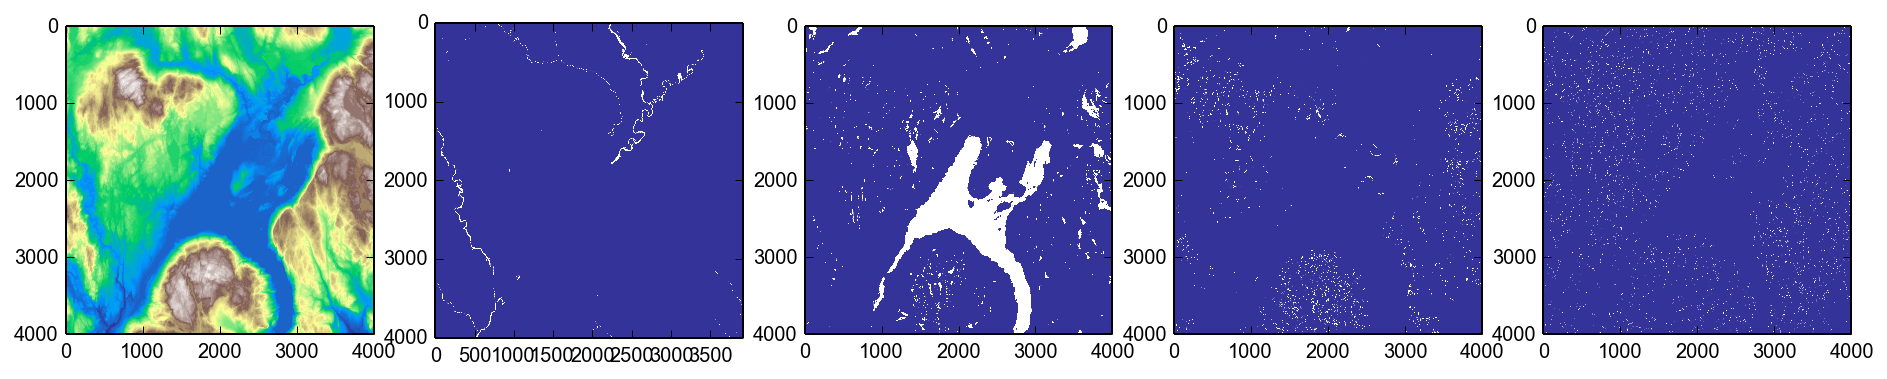

In [6]:
plt.figure()
plt.subplot(1,5,1)
previewGeotiff('anders_hoh.tiff')


plt.subplot(1,5,2)
previewGeotiff('anders_elvbekk.tiff')


plt.subplot(1,5,3)
previewGeotiff('anders_innsjo.tiff')


plt.subplot(1,5,4)
previewGeotiff('anders_myr.tiff')


plt.subplot(1,5,5)
previewGeotiff('anders_elvmidtlinje.tiff')

plt.show()

Opening out2.tiff
<class 'osgeo.gdal.Band'>
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
16016004
1
0
xres: 4002
yres: 4002
xmin: 209995.0
xmax: 250015.0
ymin: 6649985.0
ymax: 6690005.0
Geotiff size: (4002, 4002), extent: [209995.0, 250015.0, 6649985.0, 6690005.0]
Opening out2.tiff
<class 'osgeo.gdal.Band'>
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
16016004
1
0
xres: 4002
yres: 4002
xmin: 209995.0
xmax: 250015.0
ymin: 6649985.0
ymax: 6690005.0
Geotiff size: (4002, 4002), extent: [209995.0, 250015.0, 6649985.0, 6690005.0]


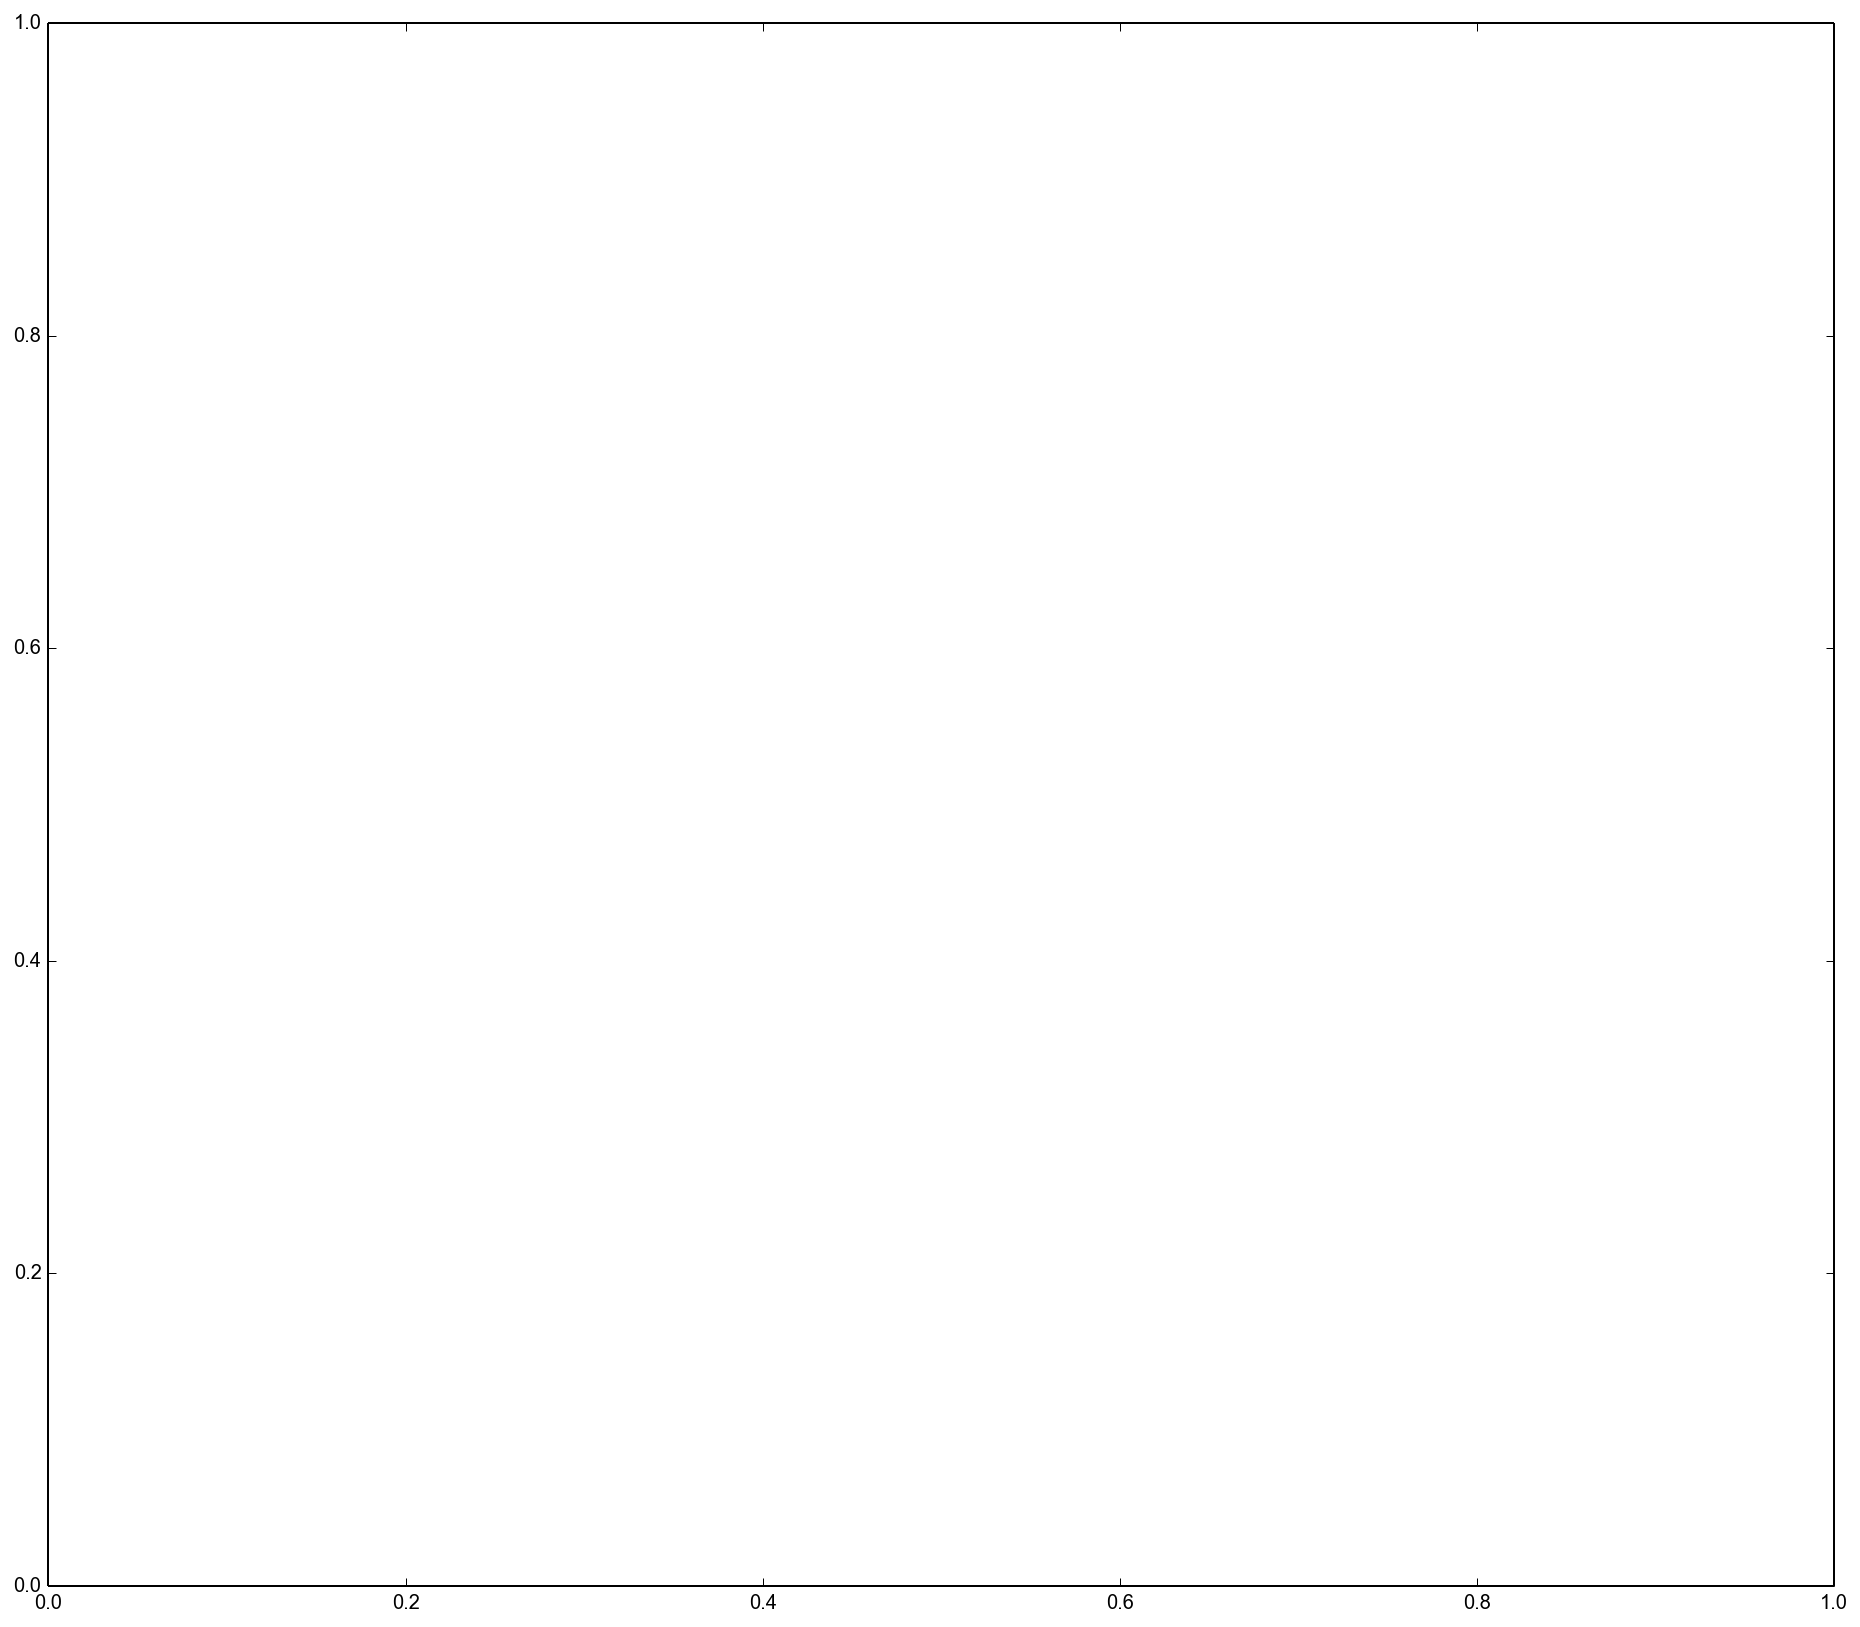

In [7]:
#arrElvebekk = loadGeotiffAsMaskedArray('anders_elvbekk.tiff', band = 1)
#arrElvemidtlinje = loadGeotiffAsMaskedArray('anders_elvmidtlinje.tiff', band = 1)

#previewArray(arrElvebekk + 2 * arrElvemidtlinje)
#sys.argv = ['anders_elvbekk.tiff', 'anders_elvmidtlinje.tiff']
#gm.main()
plt.subplot(1, 3, 1)
arr = loadGeotiffAsMaskedArray('out2.tiff', band = 1)
previewArray(arr)

plt.subplot(1, 3, 2)
arr = loadGeotiffAsMaskedArray('out2.tiff', band = 2)
previewArray(arr)

plt.subplot()





In [8]:
arrHoyde = loadGeotiffAsMaskedArray('anders_hoh.tiff', band = 1)
type(arrHoyde)
np.ma.shape(arrHoyde)


Opening anders_hoh.tiff
<class 'osgeo.gdal.Band'>
[[-32767.            399.79998779    396.8999939  ...,    377.8999939
     378.1000061     378.1000061 ]
 [-32767.            402.5           399.3999939  ...,    377.29998779
     377.5           377.5       ]
 [-32767.            405.3999939     402.         ...,    376.6000061
     376.79998779    376.8999939 ]
 ..., 
 [-32767.            195.30000305    191.3999939  ...,    124.
     123.59999847    123.09999847]
 [-32767.            197.5           193.80000305 ...,    124.90000153
     124.40000153    123.80000305]
 [-32767.         -32767.         -32767.         ..., -32767.         -32767.
  -32767.        ]]
16008001
710.5
-32767.0
xres: 4001
yres: 4001
xmin: 209995.0
xmax: 250005.0
ymin: 6649995.0
ymax: 6690005.0
Geotiff size: (4001, 4001), extent: [209995.0, 250005.0, 6649995.0, 6690005.0]


(4001, 4001)